In [1]:
import pandas as pd
from scipy.spatial.distance import cosine

In [2]:
#Prepare Data
import pandas as pd
df = pd.read_csv('Customer Survey_Fix.csv')
df.head(5)

,Unnamed: 0,ประทับเวลา,Mountain bike,Collagen,Brownie space,Mekhong,Botox,Marijuana Cannabis,Hemp Cannabis,Sphygmomanometer,...,Light mango,Automatic cat toilet,Chanel bag,Kaki Kajak Pork Leg with Rice (Online),Cordyceps,Healthy pillow for insomnia,"Cat food clean, healthy shape",Deedo Orange Juice,Licensed Software,Sunscreen
0,20-03-21,11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,20-03-21,11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,20-03-21,11:54:05,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,20-03-21,11:54:13,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,20-03-21,11:54:18,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [3]:
items = df.drop(['Unnamed: 0', 'ประทับเวลา'], axis=1)
items = items.replace('ไม่เคย', 0)
items = items.replace('เคย', 1)
items.head(5)

,Mountain bike,Collagen,Brownie space,Mekhong,Botox,Marijuana Cannabis,Hemp Cannabis,Sphygmomanometer,Light Bulb RGB,Bikini wax,...,Light mango,Automatic cat toilet,Chanel bag,Kaki Kajak Pork Leg with Rice (Online),Cordyceps,Healthy pillow for insomnia,"Cat food clean, healthy shape",Deedo Orange Juice,Licensed Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0.0,0,1.0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,...,1,0,0.0,0,0.0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1.0,0,0.0,1,0,1,1,1


In [4]:
data_ibs = pd.DataFrame(index=items.columns,columns=items.columns)
data_ibs

,Mountain bike,Collagen,Brownie space,Mekhong,Botox,Marijuana Cannabis,Hemp Cannabis,Sphygmomanometer,Light Bulb RGB,Bikini wax,...,Light mango,Automatic cat toilet,Chanel bag,Kaki Kajak Pork Leg with Rice (Online),Cordyceps,Healthy pillow for insomnia,"Cat food clean, healthy shape",Deedo Orange Juice,Licensed Software,Sunscreen
Mountain bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Collagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie space,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mekhong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Healthy pillow for insomnia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Cat food clean, healthy shape",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deedo Orange Juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Licensed Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(items.iloc[:,i],items.iloc[:,j])
data_ibs

,Mountain bike,Collagen,Brownie space,Mekhong,Botox,Marijuana Cannabis,Hemp Cannabis,Sphygmomanometer,Light Bulb RGB,Bikini wax,...,Light mango,Automatic cat toilet,Chanel bag,Kaki Kajak Pork Leg with Rice (Online),Cordyceps,Healthy pillow for insomnia,"Cat food clean, healthy shape",Deedo Orange Juice,Licensed Software,Sunscreen
Mountain bike,1,0.573415,0.33541,0.400892,0.416667,0.265165,0.25,0.485071,0.474342,0.144338,...,0.485071,0.433013,NaN,0.33541,NaN,0.485071,0.433013,0.464238,0.600245,0.603023
Collagen,0.573415,1,0.279751,0.334367,0.556038,0.147442,0.208514,0.404577,0.32969,0.361158,...,0.556294,0.361158,NaN,0.186501,NaN,0.606866,0.361158,0.658243,0.679439,0.722999
Brownie space,0.33541,0.279751,1,0.478091,0.447214,0.632456,0.67082,0.108465,0.141421,0.258199,...,0.21693,0.516398,NaN,0.6,NaN,0.325396,0.516398,0.249136,0.383482,0.3371
Mekhong,0.400892,0.334367,0.478091,1,0.267261,0.566947,0.400892,0.388922,0.253546,0.154303,...,0.388922,0.46291,NaN,0.239046,NaN,0.453743,0.308607,0.397033,0.412514,0.564076
Botox,0.416667,0.556038,0.447214,0.267261,1,0.235702,0.333333,0.242536,0.316228,0.19245,...,0.242536,0.19245,NaN,0.447214,NaN,0.404226,0.19245,0.309492,0.514496,0.452267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Healthy pillow for insomnia,0.485071,0.606866,0.325396,0.453743,0.404226,0.171499,0.121268,0.352941,0.306786,0.420084,...,0.470588,0.280056,NaN,0.21693,NaN,1,0.420084,0.630528,0.499134,0.621582
"Cat food clean, healthy shape",0.433013,0.361158,0.516398,0.308607,0.19245,0.408248,0.288675,0.140028,0.182574,0,...,0,0.666667,NaN,0.258199,NaN,0.420084,1,0.321634,0.297044,0.261116
Deedo Orange Juice,0.464238,0.658243,0.249136,0.397033,0.309492,0.19696,0.185695,0.450377,0.469776,0.321634,...,0.540453,0.321634,NaN,0.166091,NaN,0.630528,0.321634,1,0.732469,0.811844
Licensed Software,0.600245,0.679439,0.383482,0.412514,0.514496,0.363803,0.342997,0.540729,0.542326,0.19803,...,0.499134,0.19803,NaN,0.383482,NaN,0.499134,0.297044,0.732469,1,0.879049


In [6]:
links = data_ibs.stack().reset_index()
links.columns = ['edge1', 'edge2','value']
links

,edge1,edge2,value
0,Mountain bike,Mountain bike,1
1,Mountain bike,Collagen,0.573415
2,Mountain bike,Brownie space,0.33541
3,Mountain bike,Mekhong,0.400892
4,Mountain bike,Botox,0.416667
...,...,...,...
3020,Sunscreen,Healthy pillow for insomnia,0.621582
3021,Sunscreen,"Cat food clean, healthy shape",0.261116
3022,Sunscreen,Deedo Orange Juice,0.811844
3023,Sunscreen,Licensed Software,0.879049


In [7]:
links_filtered=links.loc[ (links['value'] > 0.85) & (links['edge1'] != links['edge2']) ]
links_filtered

,edge1,edge2,value
180,Mekhong,SangSom,0.868599
641,Ornamental trees,Cashew nuts,0.851943
676,Bolster,Curry puff,0.886716
678,Bolster,Fan,0.865181
690,Bolster,Bag,0.92932
...,...,...,...
3000,Sunscreen,Bag,1
3001,Sunscreen,Shabu,1
3006,Sunscreen,Cashew nuts,0.953463
3013,Sunscreen,Roti,0.977008


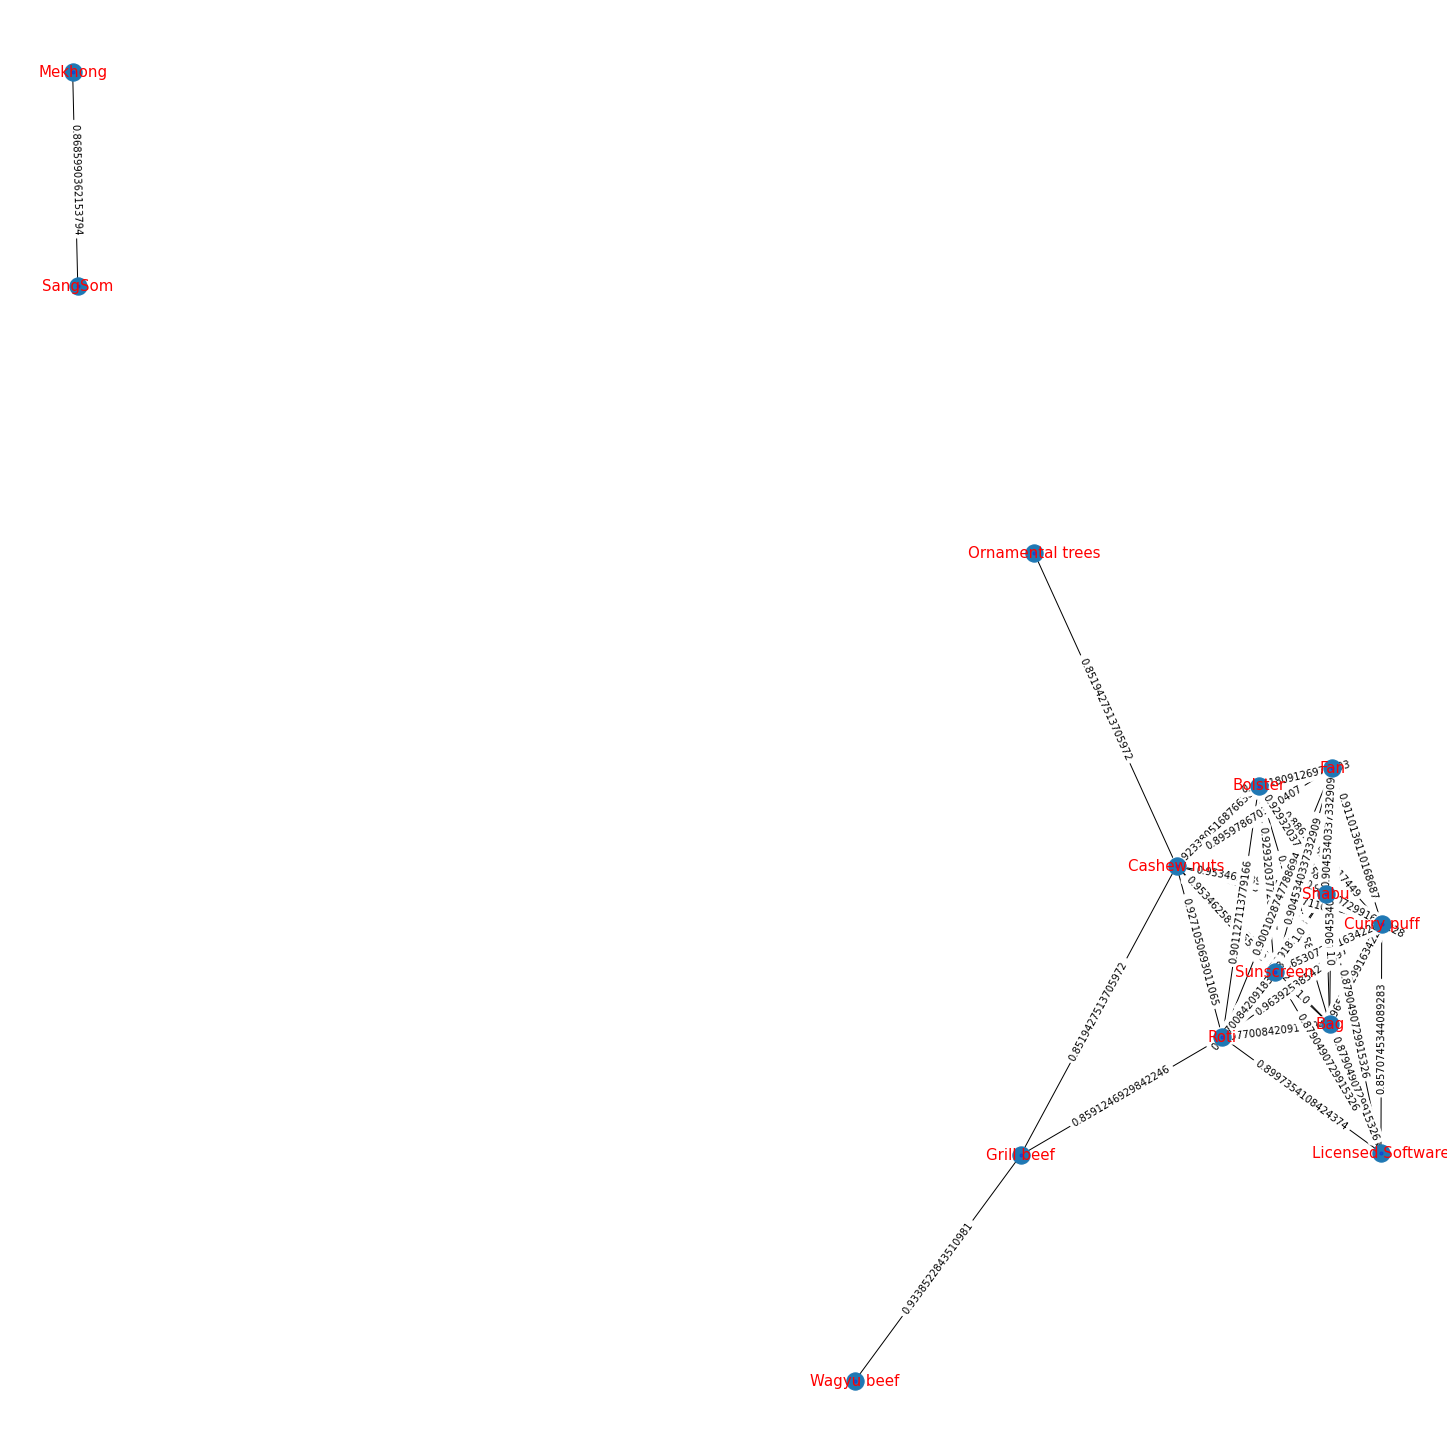

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
# Build your graph

plt.figure(figsize=(20,20))

G=nx.from_pandas_edgelist(links_filtered, 'edge1', 'edge2', 'value')
pos = nx.spring_layout(G)

nx.draw(G, pos)
#nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=15, font_color='red',  font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
plt.savefig("plot network.png", dpi=1000)
plt.show()